# Геометричні перетворення зображень

У цій лабораторній роботі розглянуті наступні приклади геометричних перетворень зображень:
1. Масшатбування
2. Обертання
3. Переміщення
4. Перекіс

### Імпортуємо необхдіні пакети та бібліотеки

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Зчитаємо та відобразимо вхідне чорно-біле зображення.

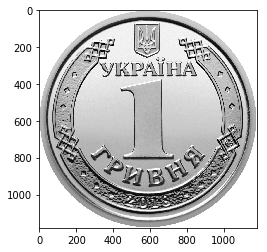

In [4]:
img = cv2.imread("./examples/hryvnia.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show();

Визначимо розміри вхідного зображення - висоту та ширину.

In [5]:
shape = img.shape
height = shape[0]
width = shape[1]
print("Height : %d" % height)
print("Width : %d" % width)

Height : 1181
Width : 1181


### Масштабування

Для масштабування вхідного зображння у OpenCV використовується функція **resize**.

### Синтаксис функції
    dst = cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])
Параметри:
* **src** - вхідне зображення;<br>
* **dsize** - розмір вихідного зображення (якщо не задано, то використовуються коефіцієнти масштабування);<br>
* **fx** - коефіцієнт масштабування по горизонтальній осі (якщо не задано використовується розмір вихідного зображення);<br>
* **fy** - коефіцієнт масштабування по вертикальній осі (якщо не задано, то використовується розмір вихідного зображення);<br>
* **interpolation** - тип інтерполяції:
    * cv2.INTER_NEAREST - інтерполяція методом найближчого сусіда;
    * cv2.INTER_LINEAR - білінійна інтерполяція;
    * cv2.INTER_AREA - зчитування зображення без змін при наявності альфа-каналу;
    * cv2.INTER_CUBIC - бікубічна інтерполяція;
    * cv2.INTER_LANCZOS4 - інтерполяція з використанням ядра Ланцоша.

Виконаємо масштабування вхідного зображення через завдання параметру **dsize = (200, 200)**. Це дозволить встановити точні значення розмріу вихідного зображення.

Height : 200
Width : 200


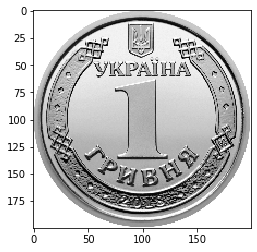

In [35]:
scale_dsize = cv2.resize(img, dsize = (200, 200), interpolation = cv2.INTER_LINEAR)
print("Height : %d" % scale_dsize.shape[0])
print("Width : %d" % scale_dsize.shape[1])
plt.imshow(scale_dsize, cmap='gray')
plt.show();

Виконаємо масштабування вхідного зображення через завдання параметрів **fx = 0.5, fy = 0.5**. Це дозволить зменшити розмір зображення по вертикальній та горизонтальній осям у два рази, відповідно.

Height : 590
Width : 590


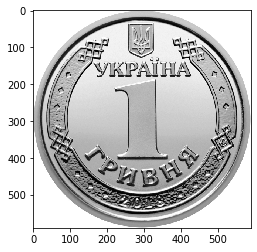

In [36]:
scale_fxfy = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
print("Height : %d" % scale_fxfy.shape[0])
print("Width : %d" % scale_fxfy.shape[1])
plt.imshow(scale_fxfy, cmap='gray')

### Обертання

Для обертання вхідного зображння у OpenCV необхідно:
* визначити матрицю обертання за допомогою функції **getRotationMatrix2D**;
* виконати афіне перетворення вхідного зображення за допмогою функції **warpAffine** та матриці обертання.

### Синтаксис функції
    dst = cv2.getRotationMatrix2D((x, y), angle, scale)
Параметри:
* **(x, y)** - координати центру обертання;<br>
* **angle** - кут обертання;<br>
* **scale** - коефіцієнт масштабування.<br>

Визначимо матриці обертання для кутів 90, 180, 270 градусів. Обертання проти годинникової стрілки.

In [47]:
M90 = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)
M180 = cv2.getRotationMatrix2D((width/2, height/2), 180, 1)
M270 = cv2.getRotationMatrix2D((width/2, height/2), 270, 1)

### Синтаксис функції
    dst =  cv2.warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]    )
Параметри:
* **src** - вхідне зображення;<br>
* **M** - матриція обертання;<br>
* **dsize** - розмір вихідного зображення;<br>
* **flags** - комбінація параметрів - тип інтерполяції та тип перетворення;<br>
* **borderMode** - метод екстраполяції меж зображення;<br> 
* **borderValue** - значення яскравості для заповнення меж зображення, 0 за замовченням.

Виконаємо афінне перетворення використовуючи визначені матриці обертання.

In [45]:
img_rot90 = cv2.warpAffine(img, M90, (width, height))
img_rot180 = cv2.warpAffine(img, M180, (width, height))
img_rot270 = cv2.warpAffine(img, M270, (width, height))

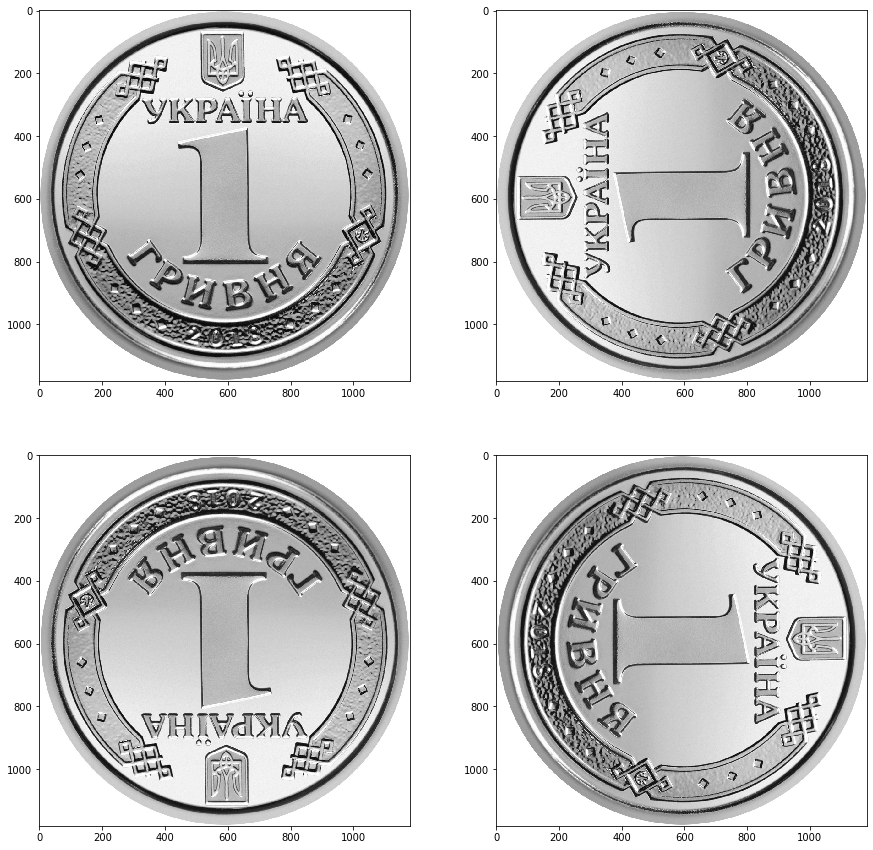

In [46]:
plt.figure(figsize = (15, 15))
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.subplot(222)
plt.imshow(img_rot90, cmap='gray')
plt.subplot(223)
plt.imshow(img_rot180, cmap='gray')
plt.subplot(224)
plt.imshow(img_rot270, cmap='gray')
plt.show();

### Переміщення

Create transformation matrix with translation in X direction 200 and in Y direction 100

In [6]:
M_hor = np.float32([[1, 0, width/2], [0, 1, 0]])
M_ver = np.float32([[1, 0, 0], [0, 1, height/2]])
M = np.float32([[1, 0, width/2], [0, 1, height/2]])

Apply transformation matrix with translation

In [7]:
img_trhor = cv2.warpAffine(img, M_hor, (width, height))
img_trver = cv2.warpAffine(img, M_ver, (width, height))
img_tr = cv2.warpAffine(img, M, (width, height))

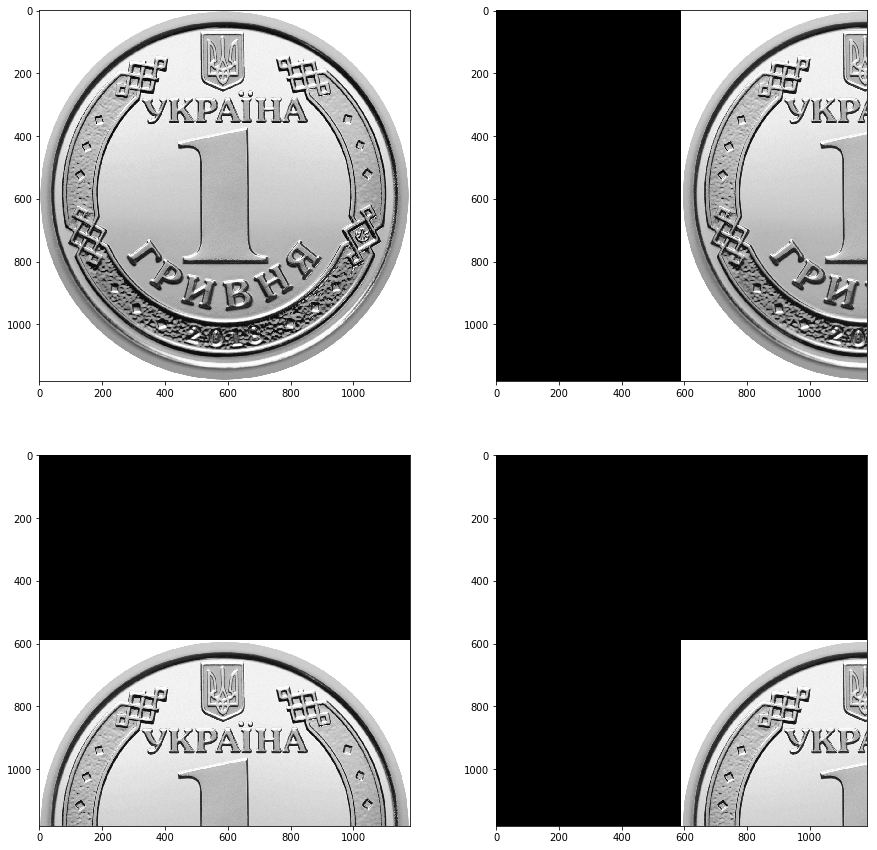

In [8]:
plt.figure(figsize=(15, 15))
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.subplot(222)
plt.imshow(img_trhor, cmap='gray')
plt.subplot(223)
plt.imshow(img_trver, cmap='gray')
plt.subplot(224)
plt.imshow(img_tr, cmap='gray')
plt.show();

### Перекіс

Create transformation matrix with skew

In [37]:
M_sk1 = np.float32([[1,1,1], [0,1,1]])
M_skm1 = np.float32([[1,-1,1], [0,1,1]])
M_skh1 = np.float32([[1,0,1], [1,1,1]])

Apply transformation matrix with translation

In [38]:
sk1 = cv2.warpAffine(img, M_sk1, (width, height))
skm1 = cv2.warpAffine(img, M_skm1, (width, height))
skh1 = cv2.warpAffine(img, M_skh1, (width, height))

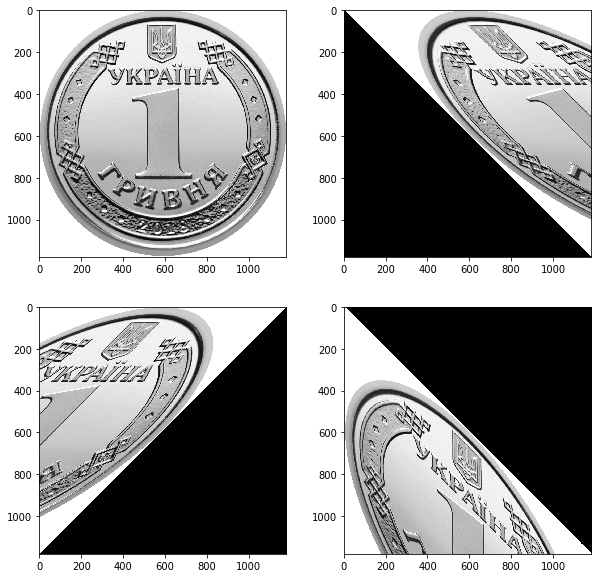

In [39]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.subplot(222)
plt.imshow(sk1, cmap='gray')
plt.subplot(223)
plt.imshow(skm1, cmap='gray')
plt.subplot(224)
plt.imshow(skh1, cmap='gray')
plt.show();

# Завдання
## 1. Зробити Bird's Eye View Transformation для даного зображення.
<table><tr>
<td> <img src="./assignments/test_img.jpg" height="300" width="300"> </td>

</tr></table>

1.1. Відкрити та завантажити наступне зображення:
    * assignments/test_img.jpg

In [ ]:
img = cv2.imread(***)

1.2 Задати область інтересу на вихідному зображенні (ROI):

In [ ]:
IMAGE_H = 223
IMAGE_W = 1280

1.3 Визначити параметри матриці перетворення. 

In [ ]:
src = np.float32([[0, IMAGE_H], [1207, IMAGE_H], [0, 0], [IMAGE_W, 0]])
dst = np.float32([[569, IMAGE_H], [711, IMAGE_H], [0, 0], [IMAGE_W, 0]])

1.4 Визначити матриці перетворення. 

In [ ]:
M = cv2.getPerspectiveTransform(***, ***) # Пряме перетворення
Minv = cv2.getPerspectiveTransform(***, ***) # Зворотнє перетворення

1.5 Визначити область інтересу на вихідному зображення

In [ ]:
img = img[450:(450+IMAGE_H), 0:IMAGE_W] 

1.6 Застосувати інверсне перетворення перспективи (Inverse Perspective Mapping) перетворення

In [ ]:
warped_img = cv2.***(img, M, (IMAGE_W, IMAGE_H))

1.7 Вивести отримане зображення

In [ ]:
plt.imshow(cv2.cvtColor(***, cv2.COLOR_BGR2RGB))
plt.show()

1.8 Зробити інверсне перетворення

In [ ]:
img_inv = cv2.***(warped_img, Minv, (IMAGE_W, IMAGE_H))

1.9 Вивести зображення

In [ ]:
plt.imshow(cv2.cvtColor(***, cv2.COLOR_BGR2RGB))
plt.show()